In [1]:
import math
import numpy as np
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from scipy.special import expit
from sklearn.model_selection import train_test_split
from numpy.random import default_rng

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import time

from wine_accpsoAnn import *



class MultiLayerPerceptron():
    # ================== Activation Functions ================ #

    # accepts a vector or list and returns a list after performing corresponding function on all elements

    @staticmethod
    def sigmoid(vectorSig):
        """returns 1/(1+exp(-x)), where the output values lies between zero and one"""
        sig = expit(vectorSig)
        return sig

    @staticmethod
    def binaryStep(x):
        """ It returns '0' is the input is less then zero otherwise it returns one """
        return np.heaviside(x, 1)

    @staticmethod
    def linear(x):
        """ y = f(x) It returns the input as it is"""
        return x

    @staticmethod
    def tanh(x):
        """ It returns the value (1-exp(-2x))/(1+exp(-2x)) and the value returned will be lies in between -1 to 1"""
        return np.tanh(x)

    @staticmethod
    def relu(x):  # Rectified Linear Unit
        """ It returns zero if the input is less than zero otherwise it returns the given input"""
        x1 = []
        for i in x:
            if i < 0:
                x1.append(0)
            else:
                x1.append(i)

        return x1

    @staticmethod
    def leakyRelu(x):
        """ It returns zero if the input is less than zero otherwise it returns the given input"""
        x1 = []
        for i in x:
            if i < 0:
                x1.append((0.01 * i))
            else:
                x1.append(i)

        return x1

    @staticmethod
    def parametricRelu(self, a, x):
        """ It returns zero if the input is less than zero otherwise it returns the given input"""
        x1 = []
        for i in x:
            if i < 0:
                x1.append((a * i))
            else:
                x1.append(i)

        return x1

    @staticmethod
    def softmax(self, x):
        """ Compute softmax values for each sets of scores in x"""
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    # ============ Activation Functions Part Ends ============= #

    # ================= Distance Calculation ================== #

    @staticmethod
    def chebishev(self, cord1, cord2, exponent_h):
        dist = 0.0
        if ((type(cord1) == int and type(cord2) == int) or ((type(cord1) == float and type(cord2) == float))):
            dist = math.pow((cord1 - cord2), exponent_h)
        else:
            for i, j in zip(cord1, cord2):
                dist += math.pow((i - j), exponent_h)
        dist = math.pow(dist, (1.0 / exponent_h))
        return dist

    @staticmethod
    def minimum_distance(self, cord1, cord2):
        # min(|x1-y1|, |x2-y2|, |x3-y3|, ...)
        dist = float('inf')
        if ((type(cord1) == int and type(cord2) == int) or ((type(cord1) == float and type(cord2) == float))):
            dist = math.fabs(cord1 - cord2)
        else:
            for i, j in zip(cord1, cord2):
                temp_dist = math.fabs(i - j)
                if (temp_dist < dist):
                    dist = temp_dist
        return dist

    @staticmethod
    def maximum_distance(self, cord1, cord2):
        # max(|x1-y1|, |x2-y2|, |x3-y3|, ...)
        dist = float('-inf')
        if ((type(cord1) == int and type(cord2) == int) or ((type(cord1) == float and type(cord2) == float))):
            dist = math.fabs(cord1 - cord2)
        else:
            for i, j in zip(cord1, cord2):
                temp_dist = math.fabs(i - j)
                if (temp_dist > dist):
                    dist = temp_dist
        return dist

    @staticmethod
    def manhattan(self, cord1, cord2):
        # |x1-y1| + |x2-y2| + |x3-y3| + ...
        dist = 0.0
        if ((type(cord1) == int and type(cord2) == int) or ((type(cord1) == float and type(cord2) == float))):
            dist = math.fabs(cord1 - cord2)
        else:
            for i, j in zip(cord1, cord2):
                dist += math.fabs(i - j)
        return dist

    @staticmethod
    def eucledian(self, cord1, cord2):
        dist = 0.0
        if ((type(cord1) == int and type(cord2) == int) or ((type(cord1) == float and type(cord2) == float))):
            dist = math.pow((cord1 - cord2), 2)
        else:
            for i, j in zip(cord1, cord2):
                dist += math.pow((i - j), 2)
        return math.pow(dist, 0.5)

    # =========== Distance Calculation Ends ============== #

    def __init__(self, dimensions=(8, 5), all_weights=(0.1, 0.2), fileName="iris", test = False):

        """
        Args:
            dimensions : dimension of the neural network
            all_weights : the optimal weights we get from the bio-algoANN models
        """

        self.allPop_Weights = []
        self.allPopl_Chromosomes = []
        self.allPop_ReceivedOut = []
        self.allPop_ErrorVal = []

        self.all_weights = all_weights

        self.fitness = []

        # ================== Input dataset and corresponding output ========================= #

        self.fileName = fileName
        self.fileName += ".csv"
        data = pd.read_csv(self.fileName, sep=';')
        data = data.infer_objects()

        output_values_expected = []
        input_values = []

        # ~~~~ encoding ~~~~#

        # labelencoder = LabelEncoder()
        # data[data.columns[-1]] = labelencoder.fit_transform(data[data.columns[-1]])

        # one hot encoding - for multi-column
        # enc = OneHotEncoder(handle_unknown='ignore')
        # combinedData = np.vstack((data[data.columns[-2]], data[data.columns[-1]])).T
        # print(combinedData)
        # y = enc.fit_transform(combinedData).toarray()
        # y = OneHotEncoder().fit_transform(combinedData).toarray()

        #
        y = LabelBinarizer().fit_transform(data[data.columns[-1]])
        # print(y)

        # ~~~~ encoding ends~~~~#

        for j in range(len(data)):
            output_values_expected.append(y[j])

        # print(output_values_expected)

        input_values = []
        for j in range(len(data)):
            b = []
            for i in range(len(data.columns) - 1):
                b.append(data[data.columns[i]][j])
            input_values.append(b)

        self.X = input_values[:]
        self.Y = output_values_expected[:]

        # input and output
        self.X = input_values[:]
        self.Y = output_values_expected[:]
        
        self.test = test
        X_train, X_test, Y_train, Y_test = train_test_split(self.X, self.Y, test_size=0.33)
        if(self.test == True):
            self.X = X_test
            self.Y = Y_test
        else:
            self.X = X_train
            self.Y = Y_train

        self.dimension = dimensions
        # print(self.dimension)

        # ================ Finding Initial Weights ================ #

        self.pop = []  # weights
        reshaped_all_weights = []
        start = 0
        for i in range(len(self.dimension) - 1):
            end = start + self.dimension[i + 1] * self.dimension[i]
            temp_arr = self.all_weights[start:end]
            w = np.reshape(temp_arr[:], (self.dimension[i + 1], self.dimension[i]))
            reshaped_all_weights.append(w)
            start = end
        self.pop.append(reshaped_all_weights)

        self.init_pop = self.all_weights

    # ================ Initial Weights Part Ends ================ #


    def Predict(self, chromo):
        # X, Y and pop are used
        self.fitness = []
        total_error = 0
        m_arr = []
        k1 = 0
        for i in range(len(self.dimension) - 1):
            p = self.dimension[i]
            q = self.dimension[i + 1]
            k2 = k1 + p * q
            m_temp = chromo[k1:k2]
            m_arr.append(np.reshape(m_temp, (p, q)))
            k1 = k2

        y_predicted = []
        for x, y in zip(self.X, self.Y):

            yo = x

            for mCount in range(len(m_arr)):
                yo = np.dot(yo, m_arr[mCount])
                yo = self.sigmoid(yo)
            
            # converting to sklearn acceptable form
            max_yo = max(yo)
            for y_vals in range(len(yo)):
                if(yo[y_vals] == max_yo):
                    yo[y_vals] = 1
                else:
                    yo[y_vals] = 0
            y_predicted.append(yo)
        return (y_predicted, self.Y)

    def main(self):
        Y_PREDICT, Y_ACTUAL = self.Predict(self.init_pop)
        Y_PREDICT = np.array(Y_PREDICT)
        Y_ACTUAL = np.array(Y_ACTUAL)
        
        n_classes = 7
        
        label_binarizer = LabelBinarizer()
        label_binarizer.fit(range(n_classes))
        Y_PREDICT = label_binarizer.inverse_transform(np.array(Y_PREDICT))
        Y_ACTUAL = label_binarizer.inverse_transform(np.array(Y_ACTUAL))
        
        # find error
        if(self.test == True):
            print("\n Actual / Expected", Y_ACTUAL)
            print("\n Predictions", Y_PREDICT)
            print("\n\nConfusion Matrix")
            print(confusion_matrix(Y_ACTUAL, Y_PREDICT))

            print("\n\nClassification Report")
            target_names = []
            for i in range(7):
                k='class '+str(i)
                target_names.append(k)
            print(classification_report(Y_ACTUAL, Y_PREDICT, target_names=target_names))
            print("\n\n\n")
        return accuracy_score(Y_ACTUAL, Y_PREDICT)


Time for inputting data :  0.35999226570129395
============ Calling PSO to get best weights ===============
Initial worst fitness =  29178.939139366325 

 Initial best fitness =  27812.252205105673
--------------GENERATION 0-----------
16765.65679917114
--------------GENERATION 1-----------
16735.200838195877
--------------GENERATION 2-----------
16685.026132338728
--------------GENERATION 3-----------
16794.481598850074
--------------GENERATION 4-----------
16800.338801306403
--------------GENERATION 5-----------
16827.814653860172
--------------GENERATION 6-----------
16410.995419007926
--------------GENERATION 7-----------
16432.97476861261
--------------GENERATION 8-----------
17437.999988591066
--------------GENERATION 9-----------
17128.62606820449
Global :  5550.999710463857
Time taken :  346.1956276893616

 Fitness :  5550.999710463857 
 Best Weights :  [-15.11147745  98.22210856  99.15959465 ... -37.47624748 122.65845427
 -65.550794  ] 
 Dimensions :  [11, 100, 10, 7]
Time Tak

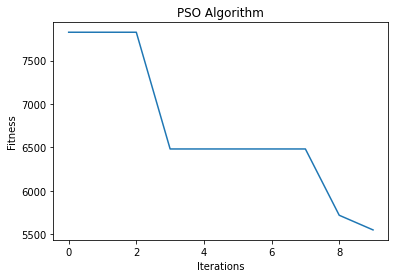

In [2]:
start_time = time.time()
i = InputData(fileName="../../ANN/winequality-white")
input_val, output_val = i.main()
end_time = time.time()
print("Time for inputting data : ", end_time - start_time)
        
print("============ Calling PSO to get best weights ===============")

start_time = time.time()

a = psoAnn(initialPopSize=100, m=1, input_values=input_val, output_values_expected=output_val, iterations = 10, dimensions = [100,10])

fit, b, weights, dim, all_gen_best_weight = a.main()

end_time = time.time()
print("Time taken : ", end_time - start_time)

print("\n Fitness : ", fit, "\n Best Weights : ", weights, "\n Dimensions : ", dim)



import matplotlib.pyplot as plt
x=b[:]
z=[i for i in range(0,10)]
plt.plot(z,x)

plt.title("PSO Algorithm")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
end_time = time.time()
print("Time Taken : ", end_time - start_time)

In [3]:
print("\n\n============= MLP Program Begins ============")

start_time = time.time()
print("Training")
m = MultiLayerPerceptron(fileName="../../ANN/winequality-white", dimensions=dim, all_weights=weights)
m.main()
end_time = time.time()
print("Time taken = ", end_time - start_time)



============= MLP Program Begins ============
Training
Time taken =  1.8440091609954834


In [4]:
start_time = time.time()
print("Testing")
m = MultiLayerPerceptron(fileName="../../ANN/winequality-white", dimensions=dim, all_weights=weights, test = True)
m.main()

end_time = time.time()
print("Time taken = ", end_time - start_time)

Testing

 Actual / Expected [2 3 3 ... 2 4 3]

 Predictions [3 1 3 ... 3 3 3]


Confusion Matrix
[[  0   1   0   3   0   0   0]
 [  0   1   0  51   0   0   0]
 [  0  10   0 475   0   0   0]
 [  0  28   0 716   0   0   0]
 [  0   9   0 267   0   0   0]
 [  0   3   0  52   0   0   0]
 [  0   0   0   1   0   0   0]]


Classification Report
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         4
     class 1       0.02      0.02      0.02        52
     class 2       0.00      0.00      0.00       485
     class 3       0.46      0.96      0.62       744
     class 4       0.00      0.00      0.00       276
     class 5       0.00      0.00      0.00        55
     class 6       0.00      0.00      0.00         1

    accuracy                           0.44      1617
   macro avg       0.07      0.14      0.09      1617
weighted avg       0.21      0.44      0.29      1617





Time taken =  1.540001392364502


C:\Users\anant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

0.35964644925327643
0.3581225236208473
0.36086558975921973
0.44955806156659556
0.4459006400487656
0.45595854922279794
0.4480341359341664
0.44986284669308135
0.44529106979579397
0.4398049375190491


Text(0.5, 0, 'Iterations')

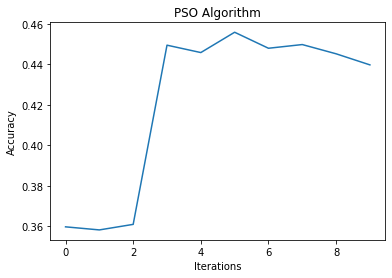

In [5]:
all_accuracy = []
for weights in all_gen_best_weight:
    m = MultiLayerPerceptron(fileName="../../ANN/winequality-white", dimensions=dim, all_weights=weights)
    accuracy_val = m.main()
    print(accuracy_val)
    all_accuracy.append(accuracy_val)

import matplotlib.pyplot as plt
x=all_accuracy[:]
z=[i for i in range(len(x))]
plt.plot(z,x)

plt.title("PSO Algorithm")
plt.ylabel("Accuracy")
plt.xlabel("Iterations")

Time for inputting data :  0.3480088710784912
============ Calling PSO to get best weights ===============
Initial worst fitness =  29203.01277735375 

 Initial best fitness =  28003.72688293805
--------------GENERATION 0-----------
14853.89364729918
--------------GENERATION 1-----------
13758.099558711567
--------------GENERATION 2-----------
13496.720168696378
--------------GENERATION 3-----------
13762.519119747876
--------------GENERATION 4-----------
14201.378151764877
--------------GENERATION 5-----------
13248.798555054567
--------------GENERATION 6-----------
8347.555045106721
--------------GENERATION 7-----------
7766.9635090816355
--------------GENERATION 8-----------
8524.791176849469
--------------GENERATION 9-----------
8434.096075873915
--------------GENERATION 10-----------
8979.093478861743
--------------GENERATION 11-----------
9024.778383882518
--------------GENERATION 12-----------
9048.877706482746
--------------GENERATION 13-----------
8553.18164560846
------------

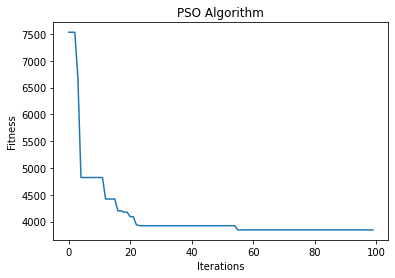

In [6]:
start_time = time.time()
i = InputData(fileName="../../ANN/winequality-white")
input_val, output_val = i.main()
end_time = time.time()
print("Time for inputting data : ", end_time - start_time)
        
print("============ Calling PSO to get best weights ===============")

start_time = time.time()

a = psoAnn(initialPopSize=100, m=10, input_values=input_val, output_values_expected=output_val, iterations = 100, dimensions = [100,10])

fit, b, weights, dim, all_gen_best_weight = a.main()

end_time = time.time()
print("Time taken : ", end_time - start_time)

print("\n Fitness : ", fit, "\n Best Weights : ", weights, "\n Dimensions : ", dim)



import matplotlib.pyplot as plt
x=b[:]
z=[i for i in range(0,100)]
plt.plot(z,x)

plt.title("PSO Algorithm")
plt.ylabel("Fitness")
plt.xlabel("Iterations")
end_time = time.time()
print("Time Taken : ", end_time - start_time)

In [7]:
print("\n\n============= MLP Program Begins ============")

start_time = time.time()
print("Training")
m = MultiLayerPerceptron(fileName="../../ANN/winequality-white", dimensions=dim, all_weights=weights)
m.main()
end_time = time.time()
print("Time taken = ", end_time - start_time)



============= MLP Program Begins ============
Training
Time taken =  0.4199991226196289


In [8]:
start_time = time.time()
print("Testing")
m = MultiLayerPerceptron(fileName="../../ANN/winequality-white", dimensions=dim, all_weights=weights, test = True)
m.main()

end_time = time.time()
print("Time taken = ", end_time - start_time)

Testing

 Actual / Expected [5 4 2 ... 2 2 3]

 Predictions [3 3 3 ... 3 3 3]


Confusion Matrix
[[  0   0   0   3   0   0   0]
 [  0   0   0  48   3   0   0]
 [  0   0   0 508   4   0   0]
 [  0   0   0 684   6   0   0]
 [  0   0   0 305   1   0   0]
 [  0   0   0  54   0   0   0]
 [  0   0   0   1   0   0   0]]


Classification Report
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         3
     class 1       0.00      0.00      0.00        51
     class 2       0.00      0.00      0.00       512
     class 3       0.43      0.99      0.60       690
     class 4       0.07      0.00      0.01       306
     class 5       0.00      0.00      0.00        54
     class 6       0.00      0.00      0.00         1

    accuracy                           0.42      1617
   macro avg       0.07      0.14      0.09      1617
weighted avg       0.20      0.42      0.26      1617





Time taken =  0.5279998779296875


C:\Users\anant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

0.05821395915879305
0.05821395915879305
0.06156659555013715
0.0332215787869552
0.18774763791526974
0.1816519353855532
0.17555623285583663
0.17921365437366657
0.18256629076501066
0.17677537336177995
0.18744285278878392
0.18073758000609572
0.44742456568119476
0.4446814995428223
0.44986284669308135
0.43218530935690336
0.44833892106065226
0.4428527887839073
0.45199634257848215
0.44742456568119476
0.44986284669308135
0.4459006400487656
0.44437671441633647
0.43919536726607744
0.4513867723255105
0.452301127704968
0.4422432185309357
0.4544346235903688
0.43706187138067665
0.44254800365742153
0.44955806156659556
0.4459006400487656
0.4440719292898507
0.45199634257848215
0.45626333434928373
0.4449862846693081
0.44071929289850653
0.45809204510819873
0.44346235903687903
0.4468149954282231
0.44864370618713806
0.45412983846388294
0.43950015239256324
0.4532154830844255
0.4480341359341664
0.44529106979579397
0.44864370618713806
0.4468149954282231
0.4401097226455349
0.4376714416336483
0.43828101188661994

Text(0.5, 0, 'Iterations')

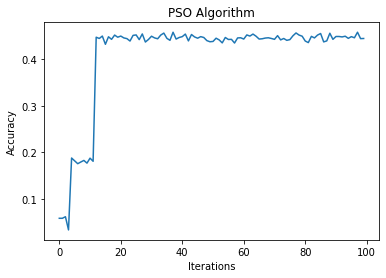

In [9]:
all_accuracy = []
for weights in all_gen_best_weight:
    m = MultiLayerPerceptron(fileName="../../ANN/winequality-white", dimensions=dim, all_weights=weights)
    accuracy_val = m.main()
    print(accuracy_val)
    all_accuracy.append(accuracy_val)

import matplotlib.pyplot as plt
x=all_accuracy[:]
z=[i for i in range(len(x))]
plt.plot(z,x)

plt.title("PSO Algorithm")
plt.ylabel("Accuracy")
plt.xlabel("Iterations")